Use a classification dataset. Implement the KNN algorithm. Experiment with at least
three different values for 'K' and determine the optimal 'K' based on a rigorous
evaluation using cross-validation.

1. Imports and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load and prepare data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Split data into training and test sets
# We will find the best 'K' using the training set and
# then report final performance on the held-out test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (105, 4)
Testing set shape: (45, 4)


2. Experimenting with 'K' using Cross-Validation

In [2]:
# We'll test K values from 1 to 30
k_range = range(1, 31)
cv_scores_mean = []
cv_scores_std = []

print("--- Running 10-fold Cross-Validation for each K ---")

# 3. Loop through each K value
for k in k_range:
    # Create a pipeline that first scales the data, then applies KNN
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    # 4. Perform 10-fold cross-validation
    # We use the training set (X_train, y_train) for this process
    scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='accuracy')
    
    # Store the mean and standard deviation of the 10 scores
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

print("--- Cross-Validation Complete ---")

--- Running 10-fold Cross-Validation for each K ---
--- Cross-Validation Complete ---


3. Determining the Optimal 'K'


The optimal value for K is: 9
This K achieved a mean cross-validated accuracy of: 0.9718


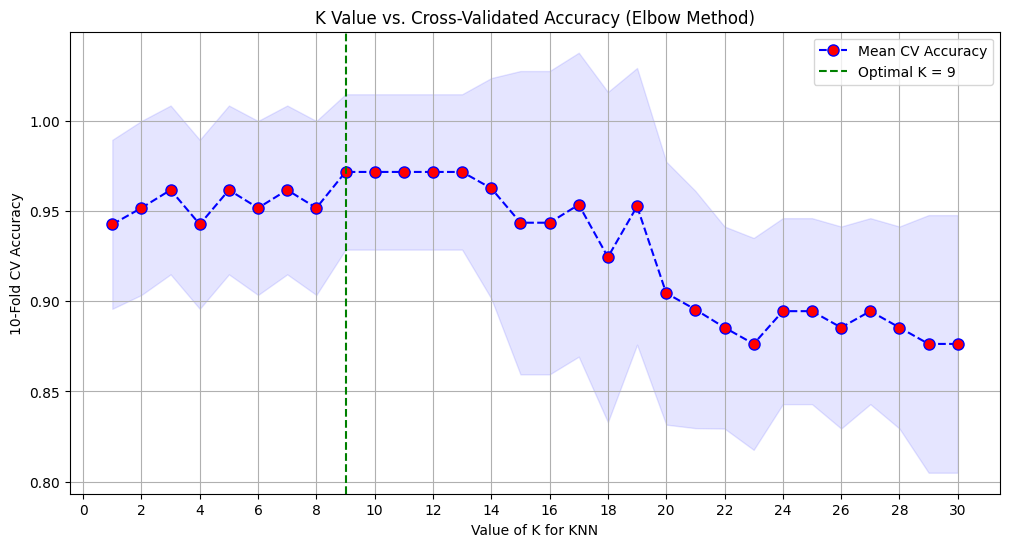

In [3]:
# 5. Find the K with the highest mean accuracy
optimal_k_index = np.argmax(cv_scores_mean)
optimal_k = k_range[optimal_k_index]
best_score = cv_scores_mean[optimal_k_index]

print(f"\nThe optimal value for K is: {optimal_k}")
print(f"This K achieved a mean cross-validated accuracy of: {best_score:.4f}")

# 6. Plot the results (Elbow Curve)
plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_scores_mean, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8, label='Mean CV Accuracy')

# Add error bars (1 standard deviation)
plt.fill_between(k_range,
                 np.array(cv_scores_mean) - np.array(cv_scores_std),
                 np.array(cv_scores_mean) + np.array(cv_scores_std),
                 alpha=0.1, color='blue')

# Highlight the optimal K
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.title('K Value vs. Cross-Validated Accuracy (Elbow Method)')
plt.xlabel('Value of K for KNN')
plt.ylabel('10-Fold CV Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 32, 2))
plt.show()

4. Final Evaluation with Optimal 'K'

In [4]:
# 7. Create and train the final model using the optimal K
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=optimal_k))
])

# Train on the full training set
final_pipeline.fit(X_train, y_train)

# Make predictions on the unseen test set
y_pred = final_pipeline.predict(X_test)

# 8. Report the final performance
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Final Model Evaluation (K={optimal_k}) ---")
print(f"Accuracy on held-out test set: {final_accuracy:.4f}")

print("\n--- Final Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))


--- Final Model Evaluation (K=9) ---
Accuracy on held-out test set: 0.9556

--- Final Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

